<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
data = pd.read_csv("/content/Market_Basket_Optimisation.csv",header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [14]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


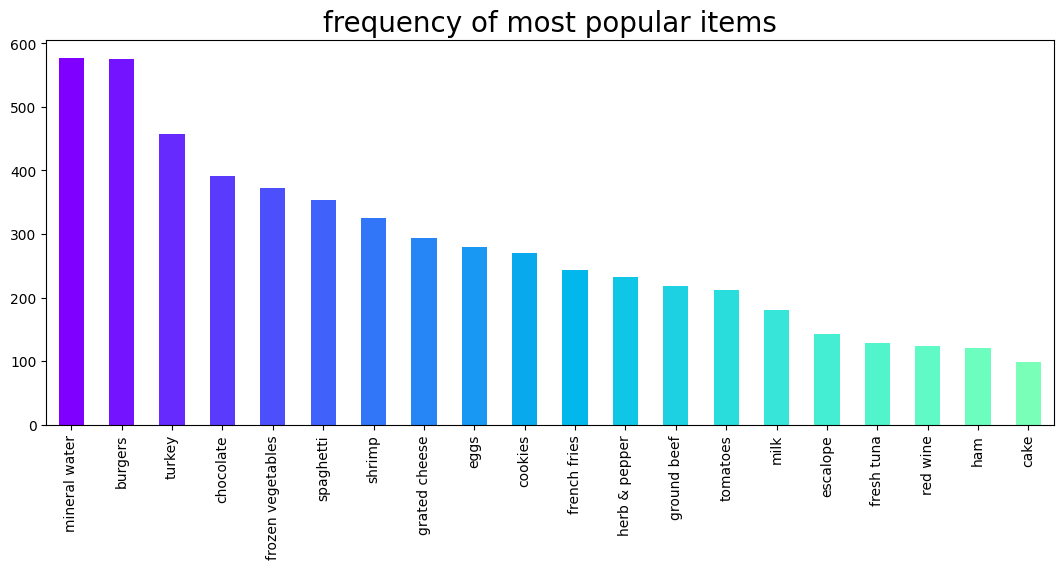

In [5]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(20).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.show()

In [8]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#popular itemsets pie chart
frequent_itemsets = apriori(onehot,min_support = 0.01,use_colnames=True)
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=1)

In [9]:
best_choice = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

Best choice to buy items together
                   antecedents                consequents  confidence  \
344        (eggs, ground beef)            (mineral water)    0.506667   
378        (milk, ground beef)            (mineral water)    0.503030   
320   (chocolate, ground beef)            (mineral water)    0.473988   
366  (frozen vegetables, milk)            (mineral water)    0.468927   
273                     (soup)            (mineral water)    0.456464   
..                         ...                        ...         ...   
266            (mineral water)                 (red wine)    0.045861   
397            (mineral water)     (olive oil, spaghetti)    0.043065   
45             (mineral water)                  (cereals)    0.043065   
345            (mineral water)        (eggs, ground beef)    0.042506   
362            (mineral water)  (french fries, spaghetti)    0.042506   

         lift  
344  2.125563  
378  2.110308  
320  1.988472  
366  1.967236  
273  1.91

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
best_choice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 344 to 362
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         406 non-null    object 
 1   consequents         406 non-null    object 
 2   antecedent support  406 non-null    float64
 3   consequent support  406 non-null    float64
 4   support             406 non-null    float64
 5   confidence          406 non-null    float64
 6   lift                406 non-null    float64
 7   leverage            406 non-null    float64
 8   conviction          406 non-null    float64
 9   zhangs_metric       406 non-null    float64
dtypes: float64(8), object(2)
memory usage: 34.9+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
itemsets = []
a =best_choice['antecedents'].astype('string')
b = best_choice['consequents'].astype('string')
itemsets = a + "," + b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
itemsets = []
a = list(best_choice['antecedents'])
b = list(best_choice['consequents'])
for i in a:
  a.append(b)
a

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
best_choice

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,itemsets
343,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342,"frozenset({'eggs', 'ground beef'}),frozenset({..."
378,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969,"frozenset({'milk', 'ground beef'}),frozenset({..."
319,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837,"frozenset({'chocolate', 'ground beef'}),frozen..."
366,"(milk, frozen vegetables)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,0.503555,"frozenset({'milk', 'frozen vegetables'}),froze..."
273,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221,"frozenset({'soup'}),frozenset({'mineral water'})"
...,...,...,...,...,...,...,...,...,...,...,...
266,(mineral water),(red wine),0.238368,0.028130,0.010932,0.045861,1.630358,0.004227,1.018584,0.507644,"frozenset({'mineral water'}),frozenset({'red w..."
398,(mineral water),"(spaghetti, olive oil)",0.238368,0.022930,0.010265,0.043065,1.878079,0.004799,1.021041,0.613868,"frozenset({'mineral water'}),frozenset({'spagh..."
44,(mineral water),(cereals),0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,0.528512,"frozenset({'mineral water'}),frozenset({'cerea..."
346,(mineral water),"(eggs, ground beef)",0.238368,0.019997,0.010132,0.042506,2.125563,0.005365,1.023507,0.695266,"frozenset({'mineral water'}),frozenset({'eggs'..."


In [55]:
itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


343    frozenset({'eggs', 'ground beef'}),frozenset({...
378    frozenset({'milk', 'ground beef'}),frozenset({...
319    frozenset({'chocolate', 'ground beef'}),frozen...
366    frozenset({'milk', 'frozen vegetables'}),froze...
273     frozenset({'soup'}),frozenset({'mineral water'})
                             ...                        
266    frozenset({'mineral water'}),frozenset({'red w...
398    frozenset({'mineral water'}),frozenset({'spagh...
44     frozenset({'mineral water'}),frozenset({'cerea...
346    frozenset({'mineral water'}),frozenset({'eggs'...
363    frozenset({'mineral water'}),frozenset({'spagh...
Length: 406, dtype: string

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([<matplotlib.patches.Wedge at 0x7f81fc0f8c70>,
 [Text(1.0355349871348143, 0.37103543014070817, "frozenset({'eggs', 'ground beef'}),frozenset({'mineral water'})"),
  Text(0.5665944875695438, 0.9428524204008845, "frozenset({'milk', 'ground beef'}),frozenset({'mineral water'})"),
  Text(-0.1342361782810728, 1.0917786627519757, "frozenset({'chocolate', 'ground beef'}),frozenset({'mineral water'})"),
  Text(-0.7599042005863, 0.7953273577158629, "frozenset({'milk', 'frozen vegetables'}),frozenset({'mineral water'})"),
  Text(-1.08227072718927, 0.196697923398314, "frozenset({'soup'}),frozenset({'mineral water'})"),
  Text(-0.9956173961167046, -0.46770289773508256, "frozenset({'spaghetti', 'pancakes'}),frozenset({'mineral water'})"),
  Text(-0.54527950964715, -0.9553377708219036, "frozenset({'spaghetti', 'olive oil'}),frozenset({'mineral water'})"),
  Text(0.09511519608675553, -1.0958800570652694, "frozenset({'spaghetti', 'milk'}),frozenset({'mineral water'})"),
  Text(0.6947997960175313, -0.

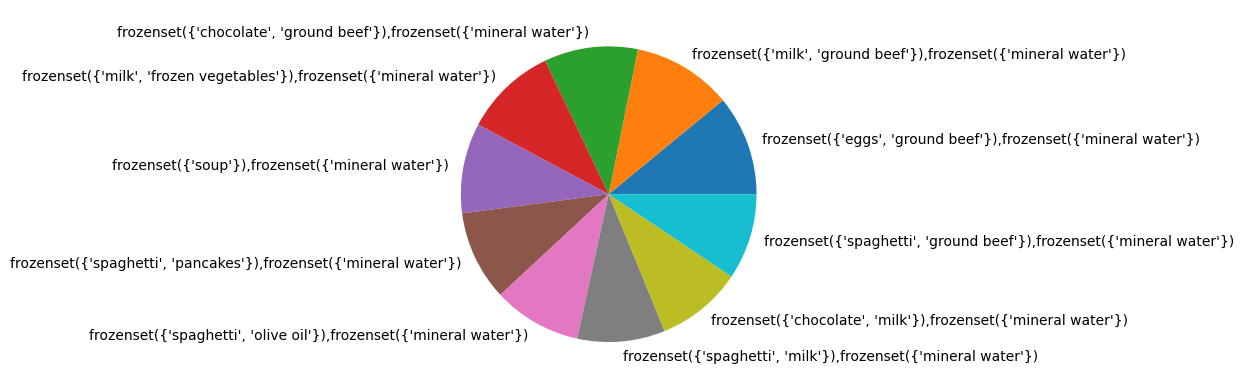

In [57]:
plt.pie(best_choice['confidence'].head(10),labels=best_choice['itemsets'].head(10))

In [ ]:
a

In [6]:
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [11]:
matrix = rules.pivot_table(index='consequents',columns='antecedents',values='support',fill_value=0,dropna=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
rules['lhs'] = rules['antecedents'].apply(lambda x:len(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents,(mineral water),(fresh bread),(honey),(red wine),"(mineral water, chocolate)","(mineral water, eggs)","(chocolate, eggs)","(chocolate, spaghetti)","(spaghetti, eggs)","(mineral water, ground beef)",...,(escalope),(frozen smoothie),(grated cheese),(low fat yogurt),(olive oil),(salmon),(shrimp),(soup),(whole wheat rice),"(pancakes, spaghetti)"
consequents,,,,,,,,,,,,,,,,,,,,,
(avocado),0.011598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(fresh bread),0.013332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(honey),0.015065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
(red wine),0.010932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(chocolate, eggs)",0.013465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(mineral water, eggs)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(mineral water, chocolate)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(spaghetti, eggs)",0.014265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(chocolate, spaghetti)",0.015865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [90]:
pivot = rules[rules['lhs']>1].pivot_table(index='antecedents',columns='consequents',values='support',fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


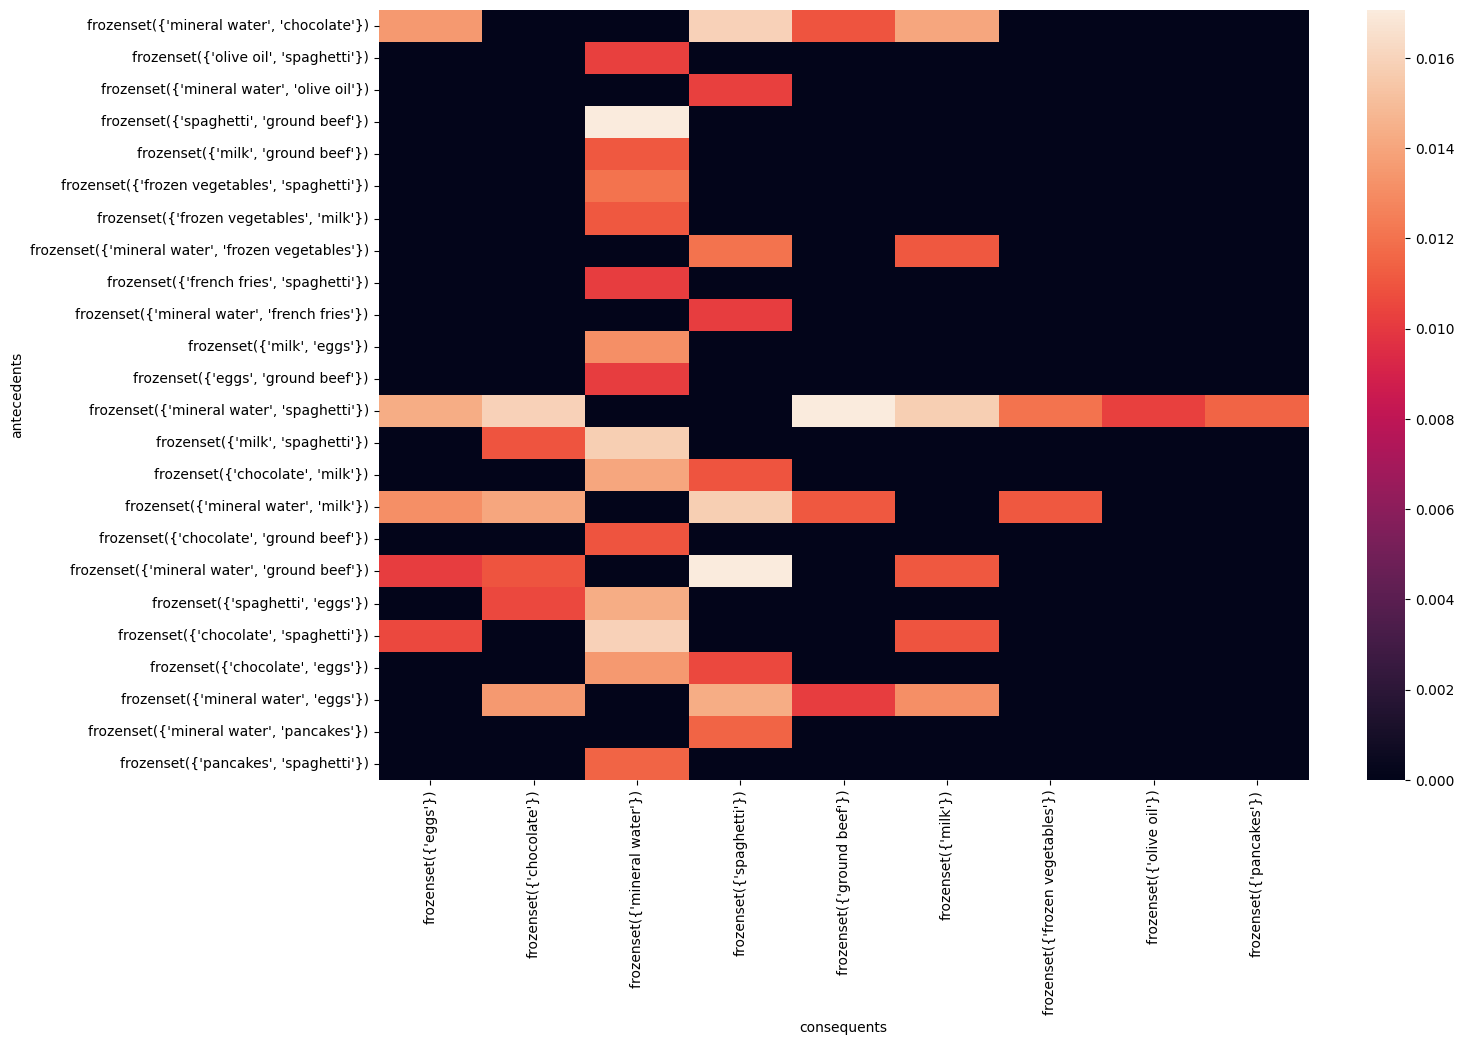

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(pivot)
plt.show()

In [38]:
pivot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


consequents,(eggs),(chocolate),(mineral water),(spaghetti),(ground beef),(milk),(frozen vegetables),(olive oil),(pancakes)
antecedents,,,,,,,,,
"(mineral water, chocolate)",0.013465,0.000000,0.000000,0.015865,0.010932,0.013998,0.000000,0.000000,0.000000
"(olive oil, spaghetti)",0.000000,0.000000,0.010265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(mineral water, olive oil)",0.000000,0.000000,0.000000,0.010265,0.000000,0.000000,0.000000,0.000000,0.000000
"(spaghetti, ground beef)",0.000000,0.000000,0.017064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(milk, ground beef)",0.000000,0.000000,0.011065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(frozen vegetables, spaghetti)",0.000000,0.000000,0.011998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(frozen vegetables, milk)",0.000000,0.000000,0.011065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(mineral water, frozen vegetables)",0.000000,0.000000,0.000000,0.011998,0.000000,0.011065,0.000000,0.000000,0.000000
"(french fries, spaghetti)",0.000000,0.000000,0.010132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
pivot.values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.01346487, 0.        , 0.        , 0.01586455, 0.01093188,
        0.01399813, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.0102653 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.0102653 , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01706439, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01106519, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.0119984 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01106519, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.0119984 , 0.        ,
        0.01106519, 0.        , 0.        , 0.        ],


In [56]:
sa=np.where(pivot>0.0015,"High","Low")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
pivot.replace(0,"No",inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
for i in pivot.values:
  for j in i:
    if j > 0.015:
      pivot.replace(j,"High",inplace=True)
    elif j < 0.011 and j != 0:
      pivot.replace(j,"low",inplace=True)
    elif j == 0:
      pivot.replace(j,"no",inplace=True)
    else:
      pivot.replace(j,"medium",inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
pivot = pivot.astype('string')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
pivot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


consequents,(eggs),(chocolate),(mineral water),(spaghetti),(ground beef),(milk),(frozen vegetables),(olive oil),(pancakes)
antecedents,,,,,,,,,
"(mineral water, chocolate)",medium,no,no,High,medium,medium,no,no,no
"(olive oil, spaghetti)",no,no,medium,no,no,no,no,no,no
"(mineral water, olive oil)",no,no,no,medium,no,no,no,no,no
"(spaghetti, ground beef)",no,no,High,no,no,no,no,no,no
"(milk, ground beef)",no,no,medium,no,no,no,no,no,no
"(frozen vegetables, spaghetti)",no,no,medium,no,no,no,no,no,no
"(frozen vegetables, milk)",no,no,medium,no,no,no,no,no,no
"(mineral water, frozen vegetables)",no,no,no,medium,no,medium,no,no,no
"(french fries, spaghetti)",no,no,medium,no,no,no,no,no,no


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


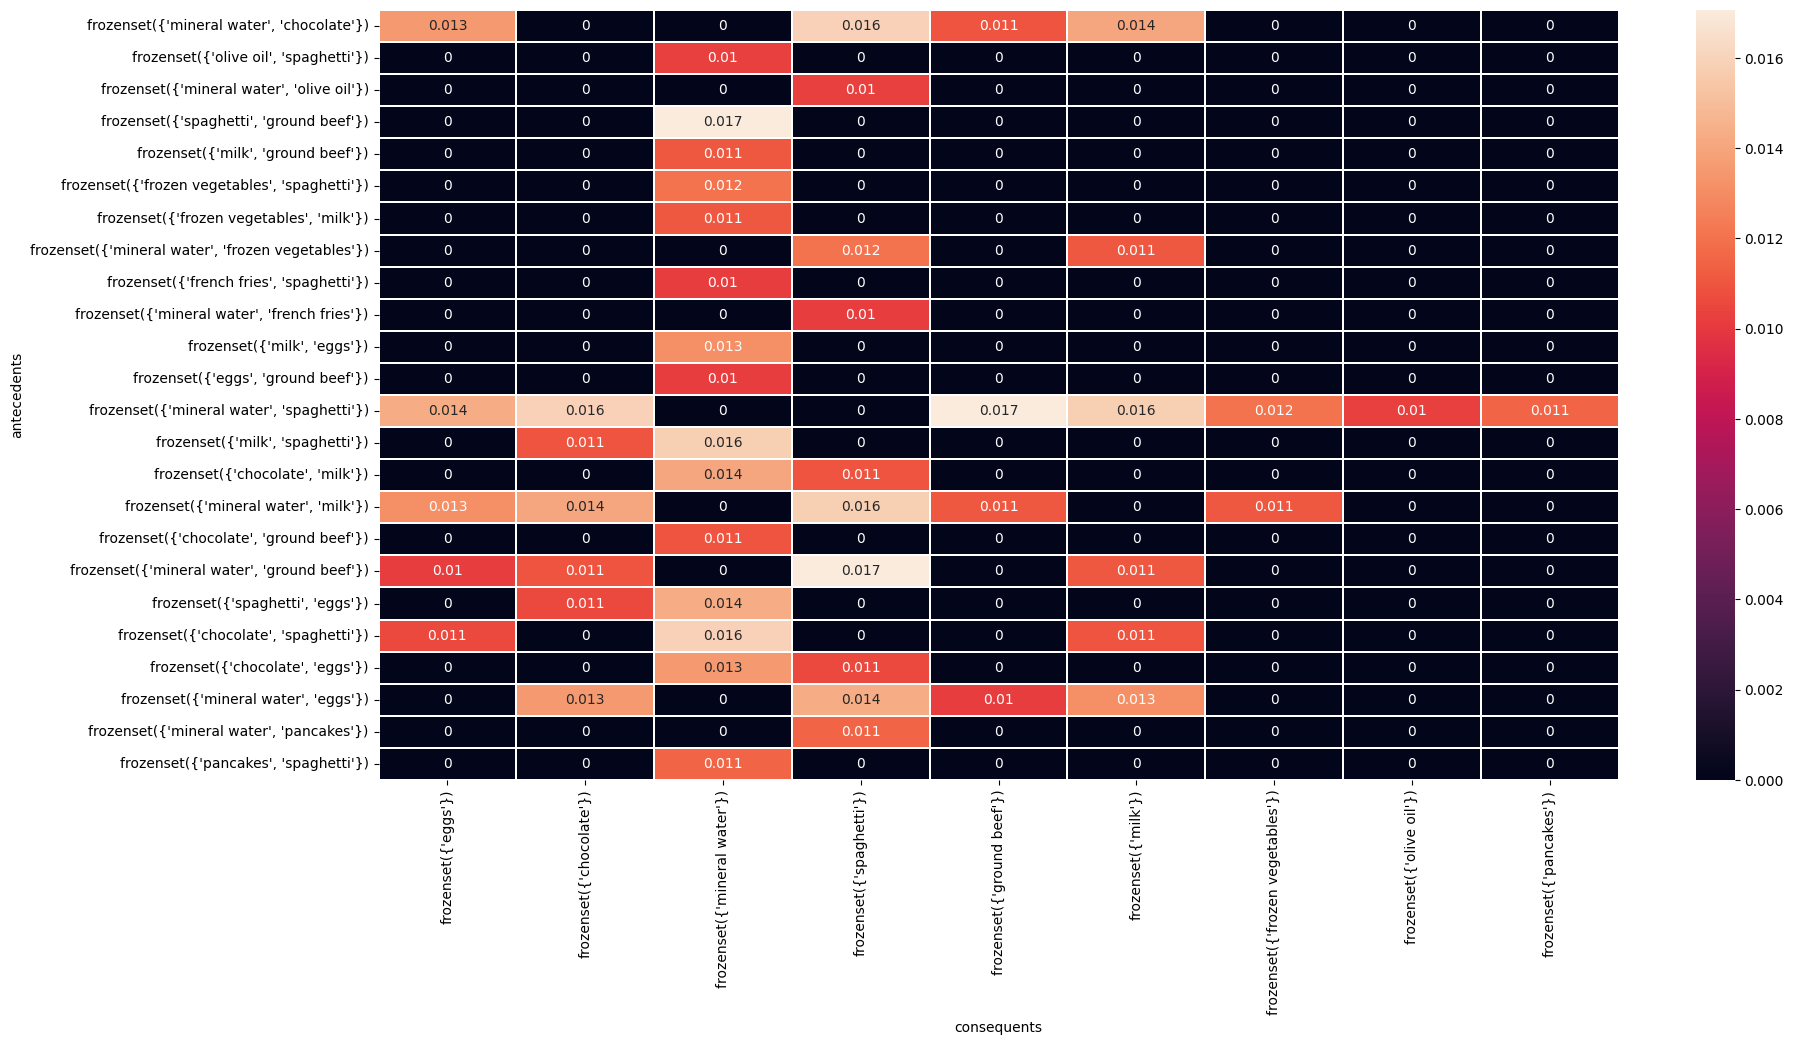

In [91]:
plt.figure(figsize=(20,10))
sns.heatmap(pivot,linewidths=0.3,annot=True)
plt.show()

In [7]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [87]:
def conviction(antecedent,consequent):
  supportAC = np.logical_and(antecedent,consequent).mean()
  supportA = antecedent.mean()
  supportnC = 1.0 - consequent.mean()
  supportAnC = supportA - supportAC
  return supportA * supportnC / supportAnC

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
